# Homework \#4
***

Tom Curran 

July 15, 2018

OSM Bootcamp 2018

***

In [25]:
import sympy as s
import pandas as pd
import numpy as np
import numpy.linalg as la
from scipy.misc import derivative
import matplotlib.pyplot as plt

# 6.6

In [5]:
x,y = s.symbols('x y')

fn = 3*y*x**2 + 4*x*y**2 + x*y

foc_x = s.diff(fn,x)

foc_y = s.diff(fn,y)

First order Conditions of X and Y

$Df(x) = 6xy + 4y^2 + y$ 

$Df(y) = 3x^2 + 8xy + x$ 

critical point: (0,0)
***

$\text{if }y = 0, 0 = 3x^2 + 8x(0)+x \Rightarrow 3x^2 +x = 0 \Rightarrow x(3x + 1) = 0 \Rightarrow 3x + 1 =0 \Rightarrow x = \frac{1}{3}$

critical point: ($\frac{1}{3}$, 0)

***

$0 = 6xy + 4y^2 + y \Rightarrow y(6x + 4y + 1) \Rightarrow 6x + 4y + 1$

$x = \frac{4y + 1}{6}$

$0 = 3(\frac{-4y - 1}{6})^2 + 8y(\frac{-4y - 1}{6}) + \frac{-4y - 1}{6}$

$y = \frac{-1}{4} \ or \ \frac{-1}{12}$

\begin{equation}
x=
\begin{cases}
    0 \ \text{if} \ y = \frac{-1}{4}\\
    \frac{-1}{9} \ \text{if} \ y = \frac{-1}{12}\\
\end{cases}
\end{equation}

critical points:
* (0,0)
* ($\frac{1}{3}$,0)
* ($\frac{-1}{9}$,$\frac{-1}{12}$)
* (0, $\frac{-1}{4}$)


In [6]:
#turn critical points into a 2d array for storage
critical_vals = np.array([[0,0],[1/3,0],[-1/9, -1/12], [0,-1/4]])
print(critical_vals)

[[ 0.          0.        ]
 [ 0.33333333  0.        ]
 [-0.11111111 -0.08333333]
 [ 0.         -0.25      ]]


In [7]:
def hessian_vals(vals):
    '''
    Takes the 2d array of critical points (1 at a time) and runs them through the hessian matrix
    '''
    x,y = vals
    matrix = np.zeros([2,2])
    matrix[0][0] = 6 * y
    matrix[0][1] = 6*x + 8*y + 1
    matrix[1][0] = 6*x + 8*y + 1
    matrix[1][1] = 8*x
    print(matrix)
    
    determinants = la.det(matrix)
    print("determinants:", determinants)
    print("")

In [8]:
for i in range(len(critical_vals)):
    print("Critical Value Pair: {}".format(i+1))
    hessian_vals(critical_vals[i])

Critical Value Pair: 1
[[0. 1.]
 [1. 0.]]
determinants: -1.0

Critical Value Pair: 2
[[0.         3.        ]
 [3.         2.66666667]]
determinants: -9.000000000000002

Critical Value Pair: 3
[[-0.5        -0.33333333]
 [-0.33333333 -0.88888889]]
determinants: 0.33333333333333337

Critical Value Pair: 4
[[-1.5 -1. ]
 [-1.   0. ]]
determinants: -1.0



In [9]:
hessian = s.hessian(fn, [x,y])
print(hessian)

Matrix([[6*y, 6*x + 8*y + 1], [6*x + 8*y + 1, 8*x]])


\begin{equation}
   Hf(x,y) = \begin{bmatrix}
    6y & 6x + 8y + 1 \\
    6x + 8y + 1 & 8x \\
    \end{bmatrix}
\end{equation}

\begin{equation}
   Hf(0,0) = \begin{bmatrix}
    0 & 1 \\
    1 & 0 \\
    \end{bmatrix}
\end{equation}

\begin{equation}
   Hf(\frac{1}{3},0) = \begin{bmatrix}
    0 & 3 \\
    3 & 2\frac{2}{3} \\
    \end{bmatrix}
\end{equation}


\begin{equation}
   Hf(\frac{-1}{9},\frac{-1}{12}) = \begin{bmatrix}
    \frac{1}{2} & \frac{-1}{3} \\
    \frac{-1}{3} & \frac{-8 }{9}\\
    \end{bmatrix}
\end{equation}


\begin{equation}
   Hf(0,\frac{-1}{4}) = \begin{bmatrix}
    \frac{-3}{2} & -1 \\
    -1 & 0 \\
    \end{bmatrix}
\end{equation}



this shows that $(\frac{-1}{9},\frac{-1}{12})$ is the max

# 6.7

In [49]:
A = np.random.random((5,5))
print("Shape of Matrix A: {}".format(A.shape))
A_T = A.T
print("Shape of Matrix A transposed: {}".format(A_T.shape))
Q = A +A.T
print(r"$Q = A + A^T$, has shape: ",Q.shape)

Shape of Matrix A: (5, 5)
Shape of Matrix A transposed: (5, 5)
$Q = A + A^T$, has shape:  (5, 5)


Prove that equation 6.17 is equal to 6.18:

Equation 6.17:
\begin{equation}
f(x) = x^TAx - b^Tx + c 
\end{equation}

Equation 6.18:
\begin{equation}
f(x) = \frac{1}{2} x^TQx - b^Tx + c
\end{equation}

if $x^TQx = 2x^TAx$ than by substituting it into equation 6.18:

\begin{equation}
f(x) = \frac{1}{2}(2x^TAx) - b^Tx+c
\end{equation}

the result is equation 6.17

In [50]:
x,A,b,c = s.symbols('x A b c')

fn = x * A * x - b *x + c

foc = s.diff(fn,x)
print(foc)

2*A*x - b


\begin{equation}
2A^Tx - b^T = 0 \\ 
2A^Tx = b^T
\end{equation}

and since we showed that $2A^Tx = x^tQx$ we can subtitute in that value to get

\begin{equation}
x^TQx = b^T
\end{equation}

iii.

# 6.11

\begin{equation}
q(x) = ax^2 +bx+ c \\ 
q(x) := f(x_0) + f^\prime(x_0)(x-x_0) + \frac{1}{2} f^{\prime\prime}(x_0)(x-x_0)^2
\end{equation}


we let $x_1$ satisfy $0 = q^\prime(x_1)$

\begin{equation}
x_1 = x_0 - \frac{f^\prime(x_0)}{f^{\prime\prime}(x_0)}
\end{equation}



In [51]:
x,a,b,c = s.symbols('x a b c')
q_fn = a*x**2 + b*x + c
foc = s.diff(q_fn, x)
soc = s.diff(foc, x)
print(foc)
print(soc)

2*a*x + b
2*a


\begin{equation}
2ax_0 + b = 0 \\ 
2ax_0 = -b
\end{equation}

\begin{equation}
x_1 = x_0 - \frac{2ax_0 + b}{2a} \\
x_1 = x_0 - \frac{2ax_0}{2a} + \frac{b}{2a} \\
x_1 = x_0 - x_0 + \frac{b}{2a} \\
x_1 = \frac{b}{2a}\\
\text{and } f^{\prime\prime} = 2a > 0
\end{equation}





# 6.15

Create secant method minimizer function

function should accept 

1. two initial guesses $x_0$ and $x_1$
2. level of accuracy $\epsilon$
3. a callable function $f^{\prime}(x_0)$


**Secant Method**
$$
x_n = x_{n-1} - f^\prime(x_{n-1})\frac{x_{n-1} - x_{n-2}}{f^\prime(x_{n-1}) - f^\prime(x_{n-2})}
$$

In [36]:
#create sample function:

def fn(x):
    y = x**3 + x**2
    return(y)    

In [69]:
def secant(x1, x2, function,tol = 1e-8, iterations = 0, max_iterations = 1000):
    foc = derivative(function, x1)
    x_np1 = x2 - derivative(function, x2) * (x2 - x1)/(derivative(function, x2) - derivative(function, x1))
    return(x_np1)

In [94]:
x1, x2 = 0, -1
y = [x1, x2]

for i in range(1,10000-1):
    x_n = y[i]
    x_nm1 = y[i-1]
    y.append(secant(x1 = x_nm1, x2 = x_n, function = fn))
    

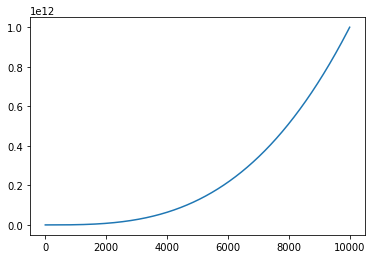

In [101]:
x = np.linspace(0,10000, num = 10000)
fn_x = x**3 + x**2
plt.plot(x, fn_x)